# Extract Evalution Results

In [9]:
def read_coco_eval_value(line):
  target_pattern = '"test_coco_eval_bbox": ['
  if target_pattern not in line:
    return None
  # Extract the substring containing the values
  start_index = line.find(target_pattern) + len(target_pattern)
  end_index = line.find(']')
  value_str = line[start_index:end_index].strip().split(',')[0]
  try:
    # Convert the extracted string to a float
    return float(value_str)
  except ValueError:
    print(f"Error: Could not convert '{value_str}' to a float (line: {line.strip()})")
    return None

def read_coco_eval_values(filename, output_filename="coco_eval_values.txt"):
  values = []
  with open(filename, 'r') as f:
    for line in f:
      value = read_coco_eval_value(line)
      if value is not None:
        values.append(value)

  # Save extracted values to a file (optional)
  with open(output_filename, 'w') as f:
    f.write(str(values))  # Write the list of values as a string
  return values


filename = "/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r18vd_5x_coco_200/log.txt"
filename = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r18vd_5x_coco_480/log.txt'
filename = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r18vd_5x_coco_640/log.txt'
output_filename = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/eval640.txt'
extracted_values = read_coco_eval_values(filename, output_filename)

if extracted_values:
  print("Extracted values:")
  print(extracted_values)
else:
  print("No matching values found in the file.")


Extracted values:
[0.8009822658723381, 0.8671779419572881, 0.8700670030952713, 0.8814671505269414, 0.8968695450649337, 0.8998243311787427, 0.8921067177190973, 0.9100351532546931, 0.9034543184707619, 0.9183922240746857, 0.9132997625079353, 0.9194399169964687, 0.9152181644245602, 0.921224549390369, 0.9200404540107373, 0.9186171107971633, 0.916216756996903, 0.9251681328570281, 0.9234652741280688, 0.9253100640676943, 0.9253188919872739, 0.9203585889382215, 0.9258507957763996, 0.9250311377628289, 0.931612420967126, 0.9285076198108815, 0.9205239543200584, 0.9244995458659785, 0.9257742105185197, 0.916769439205954, 0.9253773730031452, 0.9222626110244853, 0.9209245969094118, 0.9300577885848864, 0.9247029576490063, 0.9313259682639022, 0.9251799411888526, 0.9231980702293622, 0.9281807668352479, 0.9271791092589139, 0.9302576364010975, 0.9219528144071061, 0.9226791920326469, 0.9318952806569346, 0.9315667347794029, 0.9309915391876221, 0.9312488869561257, 0.9209540629602867, 0.9332367044929452, 0.929

# Plot lineplot for trained models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

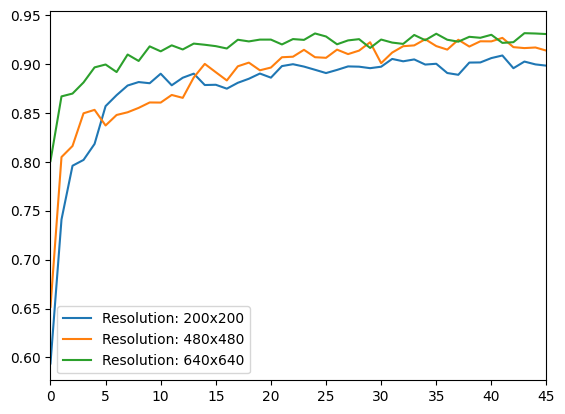

In [38]:
def read_file_to_string(filename):
  try:
      with open(filename, 'r') as file:
          text = file.read()
      return text
  except FileNotFoundError:
      raise FileNotFoundError(f"The file '{filename}' does not exist.")

# Example usage
filenames = ["/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/eval200.txt",
             "/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/eval480.txt",
              "/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/eval640.txt"]

eval_values = []
for filename in filenames:
    file_contents = read_file_to_string(filename)
    string_values = file_contents[1:-1].split(", ")
    float_values = [float(x) for x in string_values]
    data_array = np.array(float_values)
    eval_values.append(data_array)

plt.plot(eval_values[0], label="Resolution: 200x200")
plt.plot(eval_values[1], label="Resolution: 480x480")
plt.plot(eval_values[2], label="Resolution: 640x640")
plt.xlim(0, 45)
plt.legend()
plt.show()